# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load data

In [2]:
data = pd.read_csv('data/iris.csv',names=['sepal_length','sepal_width','petal_length','petal_width','iris_class'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Clean iris column (strip away 'Iris-')
data['iris_class'] = data.apply(lambda row: row.iris_class.split('-')[1],axis=1)

In [4]:
input_data = np.array(data.drop('iris_class', axis = 1))

### K-Means Clustering Algorithm

In [5]:
def loss_function(data, memberships, centroids):
    loss = 0
    for i in range(len(data)):
        loss += np.linalg.norm(data[i] - centroids[int(memberships[i])])
        
    return loss/len(data)

In [6]:
def k_means(data, n_clusters):
    centroids = data[np.random.choice(a=len(data), size=n_clusters, replace=False)]
    memberships = np.zeros(len(data))
    start_loss = loss_function(data, memberships, centroids)
    loss_diff = start_loss
    
    while loss_diff > 0.0005:
        # Update memberships
        for i in range(len(data)):
            cluster_distances = [np.linalg.norm(data[i]-c) for c in centroids]
            memberships[i] = cluster_distances.index(min(cluster_distances))

        # Recompute centroids
        for k in range(n_clusters):
            cluster_data = data[np.where(memberships == k)[0]]
            centroids[k] = np.sum(cluster_data, axis=0) / len(cluster_data)
        
        # Recompute Loss
        updated_loss = loss_function(data, memberships, centroids)
        loss_diff = start_loss - updated_loss
        start_loss = updated_loss
    
    return memberships, start_loss

### Optimal Number of Clusters
As can be seen above, the number of clusters is a variable parameter that the k-means clustering depends on. It is not possible to optimize the number of clusters in the same way that we would optimize hyperparameters in other ML models. If we define the success of clustering attempt as minimizing the sum of the euclidean distances of each point from its cluster’s centroid, the most <i>successful</i> number of clusters would simply be the total number of data instances. <br> <br>

However, such a model is not very useful. To determine the most useful number of clusters to organize the data into, we want to find a tradeoff between accuracy and generalization. Graphically, this can be done by computing and plotting the loss for several number of clusters and identifying the number of clusters corresponding to the ‘elbow point’ of the graph.

In [7]:
n_clusters = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11]
n_clusters_loss = []

for n in n_clusters:
    n_clusters_loss.append(k_means(input_data, n)[1])

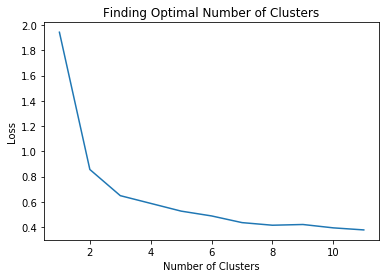

In [8]:
plt.plot(n_clusters, n_clusters_loss)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Finding Optimal Number of Clusters');

In the graph above, it appears that the 'elbow point' occurs at n_clusters=3. This is good news because we know the data should naturally fall into three groups (one for each species of iris). Although in this example we have the benefit of grouped/labeled data, generally k-means is used on unlabeled data. With unlabeled data that does not necessarily split into nice groups, this process of determining the optimal number of clusters is essential.

### Evaluation

In [9]:
data['kmeans_pred'] = k_means(data=input_data, n_clusters=3)[0]

In [10]:
data.groupby(['iris_class', 'kmeans_pred']).sepal_length.count().unstack()

kmeans_pred,0.0,1.0,2.0
iris_class,,,
setosa,50.0,NaN,NaN
versicolor,NaN,47.0,3.0
virginica,NaN,14.0,36.0


The k-means clustering algorithm was not 100% successful at grouping all instances into their correct species. Although it 100% percent of ‘setosa’ instances were grouped together, the model failed to perfectly group the other two species: ‘versicolor’ and ‘virginica’. Three versicolor instances were incorrectly grouped in the cluster containing mostly virginica instances, and 14 virginica instances were incorrectly grouped in the cluster containing mostly versicolor instances. <br> <br>

Visually, the quality of the k-means clustering groups compared to the original species groups can be seen below:

#### Original Clusters (species)

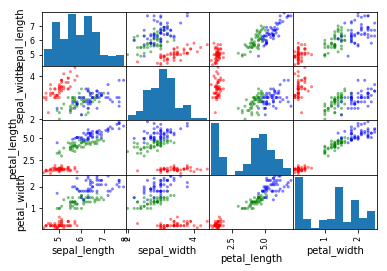

In [11]:
pd.plotting.scatter_matrix(data.drop('kmeans_pred',axis=1),c=data.iris_class.map({'setosa':'r','versicolor':'g','virginica':'b'}));

#### K-Means Clusters

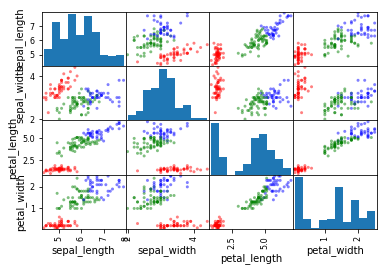

In [12]:
pd.plotting.scatter_matrix(data.drop('kmeans_pred',axis=1),c=data.kmeans_pred.map({0:'r', 1:'g', 2:'b'}));